<a target="_blank" href="https://colab.research.google.com/github/cohere-ai/cohere-developer-experience/blob/main/notebooks/guides/aya_vision_intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Introduction to Aya Vision: A state-of-the-art open-weights vision model

Introducing Aya Vision - a state-of-the-art open-weights multimodal multilingual model.

In this notebook, we will explore the capabilities of Aya Vision, which can take text and image inputs to generates text responses.

The following links provide further details about the Aya Vision model:
- [The launch blog](https://cohere.com/blog/aya-vision)
- [Documentation](https://docs.cohere.com/docs/aya-multimodal)
- HuggingFace model page for the [32B](https://huggingface.co/CohereForAI/aya-vision-32b) and [8B](https://huggingface.co/CohereForAI/aya-vision-8b) models.

This tutorial will provide a walkthrough of the various use cases that you can build with Aya Vision. By the end of this notebook, you will have a solid understanding of how to use Aya Vision for a wide range of applications.

The list of possible use cases with multimodal models is endless, but this notebook will cover the following:
- Setup
- Question answering
- Multilingual multimodal understanding
- Captioning
- Recognizing text
- Classification
- Comparing multiple images
- Conclusion

## Setup

First, install the Cohere Python SDK and create a client.


In [1]:
%pip install cohere -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.6 MB/s eta 0:00:00


In [ ]:
import cohere
import base64

co = cohere.ClientV2(
    "COHERE_API_KEY"
)  # Get your free API key here: https://dashboard.cohere.com/api-keys

Next, let's set up a function to generate text responses, given an image and a message. It uses the Cohere API via the Chat endpoint to call the Aya Vision model.

To pass an image to the API, pass a Base64-encoded image as the `image_url` argument in the `messages` parameter. To convert and image into a Base64-encoded version, we can use the `base64` library as in this example.

In [3]:
# Define the model
model="c4ai-aya-vision-32b"

def generate_text(image_path, message):
    """
    Generate text responses from Aya Vision model based on an image and text prompt.

    Args:
        image_path (str): Path to the image file
        message (str): Text prompt to send with the image

    Returns:
        None: Prints the model's response
    """

    # Define an image in Base64-encoded format
    with open(image_path, "rb") as img_file:
        base64_image_url = f"data:image/jpeg;base64,{base64.b64encode(img_file.read()).decode('utf-8')}"

    # Make an API call to the Cohere Chat endpoint, passing the user message and image
    response = co.chat(
        model=model,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": message},
                    {"type": "image_url", "image_url": {"url": base64_image_url}},
                ],
            }
        ],
    )

    # Print the response
    print(response.message.content[0].text)

Let's also set up a function to render images on this notebook as we go through the use cases.

Note: the images used in this notebook can be downloaded [here](https://github.com/cohere-ai/cohere-developer-experience/tree/main/notebooks/images/aya-vision)

In [4]:
from IPython.display import Image, display

def render_image(image_path):
    """
    Display an image in the notebook with a fixed width.

    Args:
        image_path (str): Path to the image file to display
    """
    display(Image(filename=image_path, width=400))

## Question answering

One of the more common use cases is question answering. Here, the model is used to answer questions based on the content of an image.

By providing an image and a relevant question, the model can analyze the visual content and generate a text response. This is particularly useful in scenarios where visual context is important, such as identifying objects, understanding scenes, or providing descriptions.

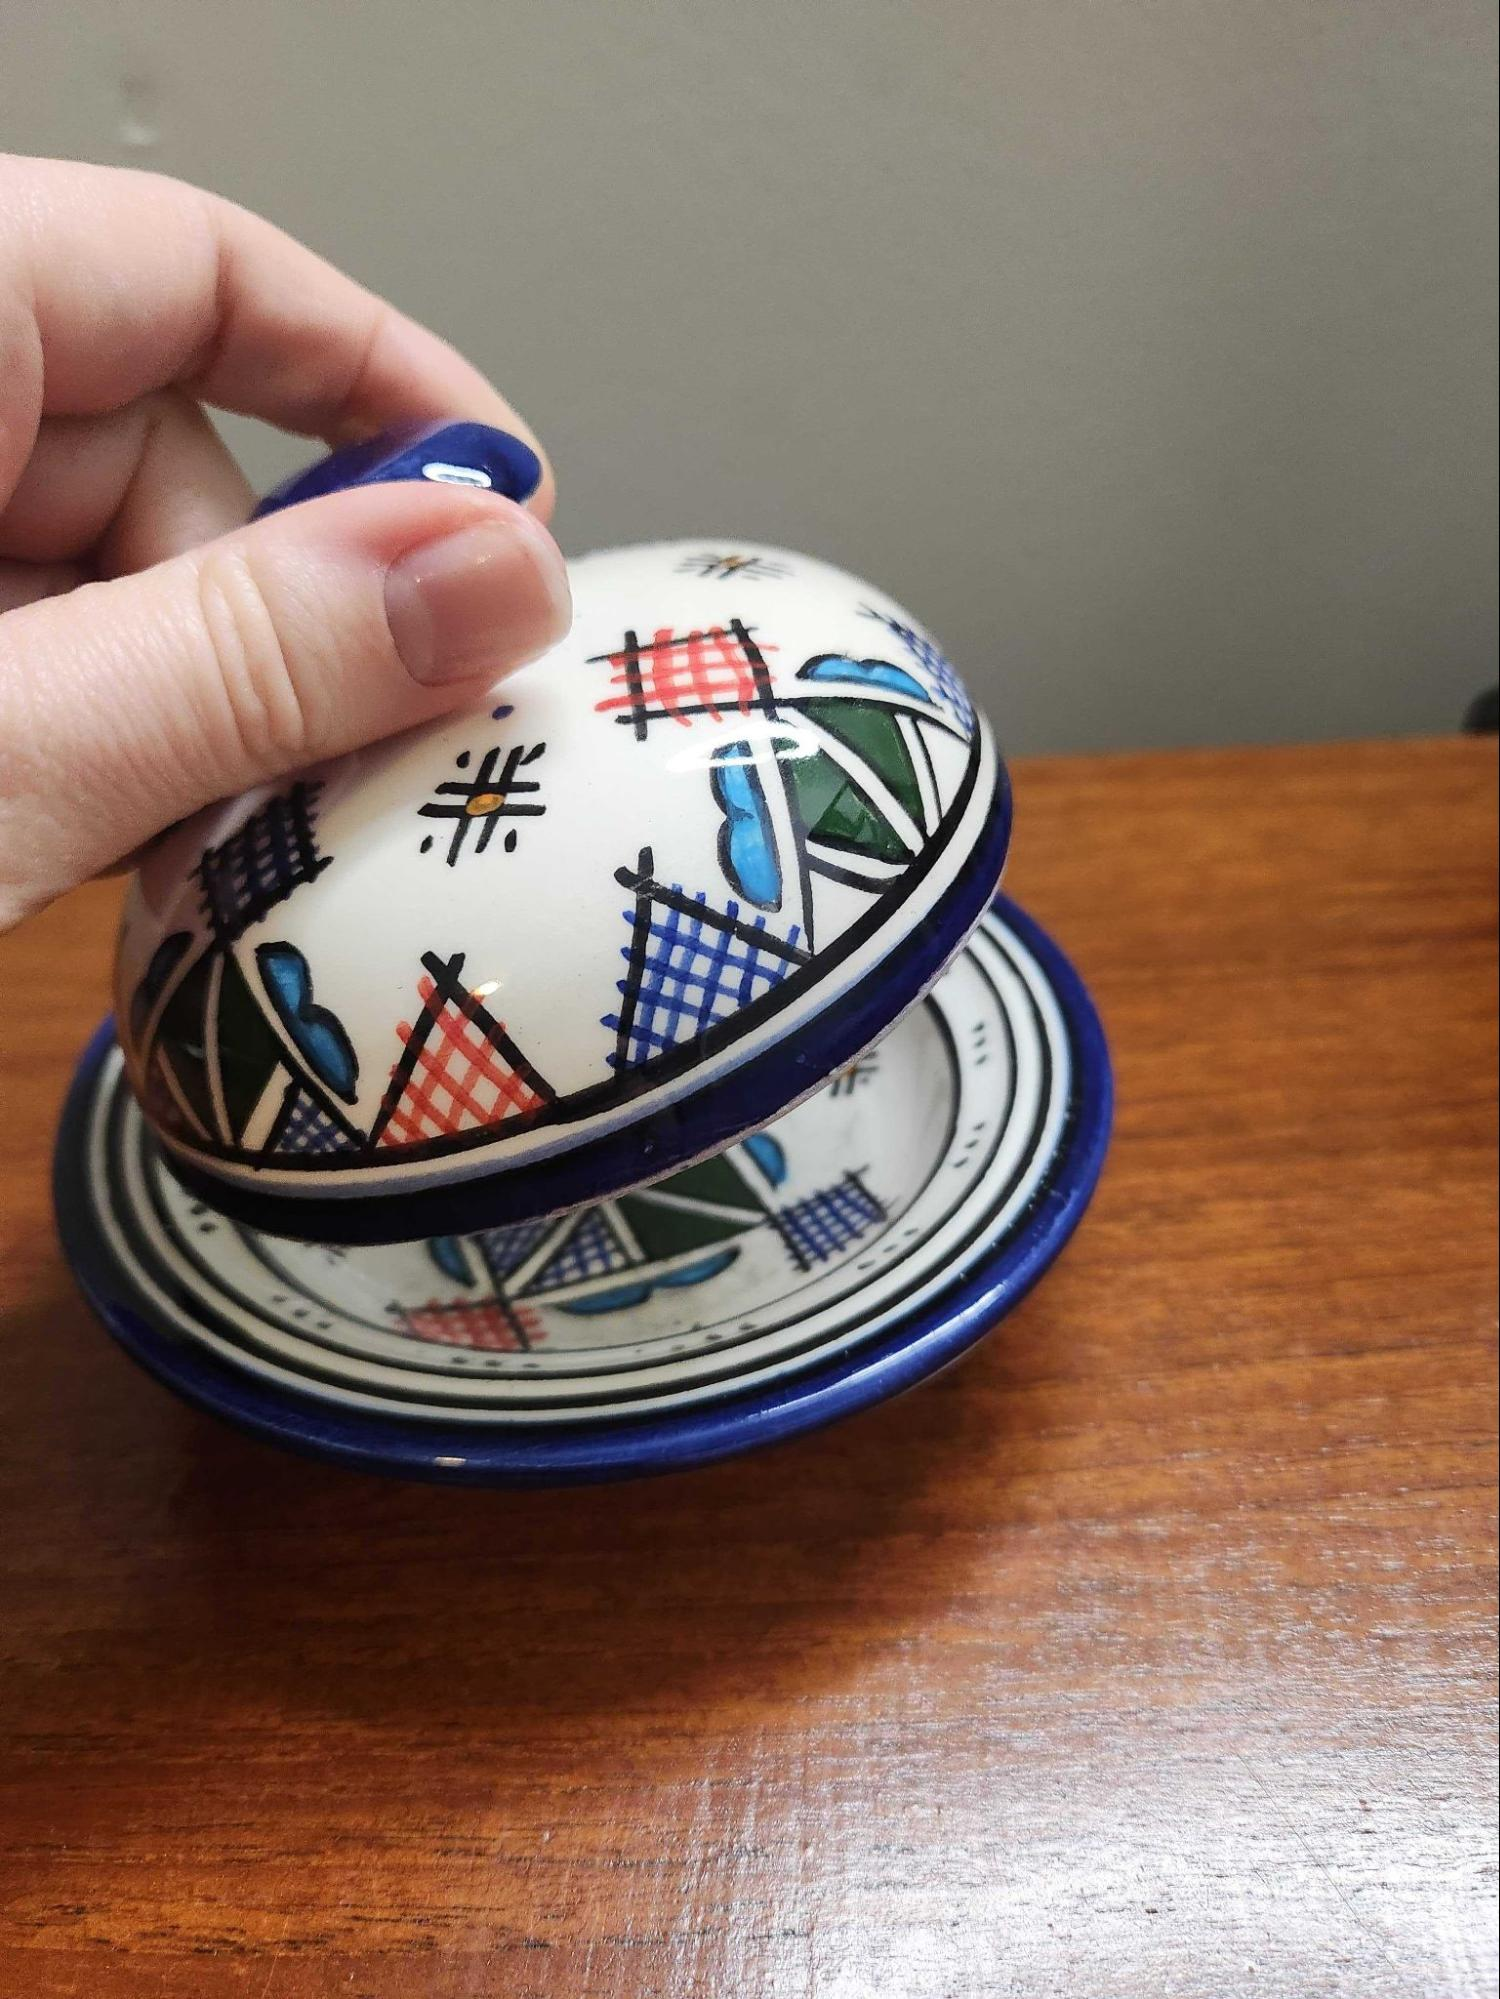

In [6]:
image_path = "image1.jpg"
render_image(image_path)

In [7]:
message = "Where is this art style from and what is this dish typically used for?"
generate_text(image_path, message)

The art style on this dish is typical of traditional Moroccan or North African pottery. It's characterized by intricate geometric patterns, bold colors, and a mix of stylized floral and abstract designs.

This type of dish is often used as a spice container or for serving small portions of food. In Moroccan cuisine, similar dishes are commonly used to hold spices like cumin, cinnamon, or paprika, or to serve condiments and appetizers.

The design and craftsmanship suggest this piece is likely handmade, which is a common practice in Moroccan pottery. The vibrant colors and detailed patterns make it not just a functional item but also a decorative piece that adds to the aesthetic of a dining table or kitchen.


## Multilingual multimodal understanding

Aya Vision can process and respond to prompts in multiple languages, demonstrating its multilingual capabilities. This feature allows users to interact with the model in their preferred language, making it accessible to a global audience. The model can analyze images and provide relevant responses based on the visual content, regardless of the language used in the query.

Here is an example in Persian:

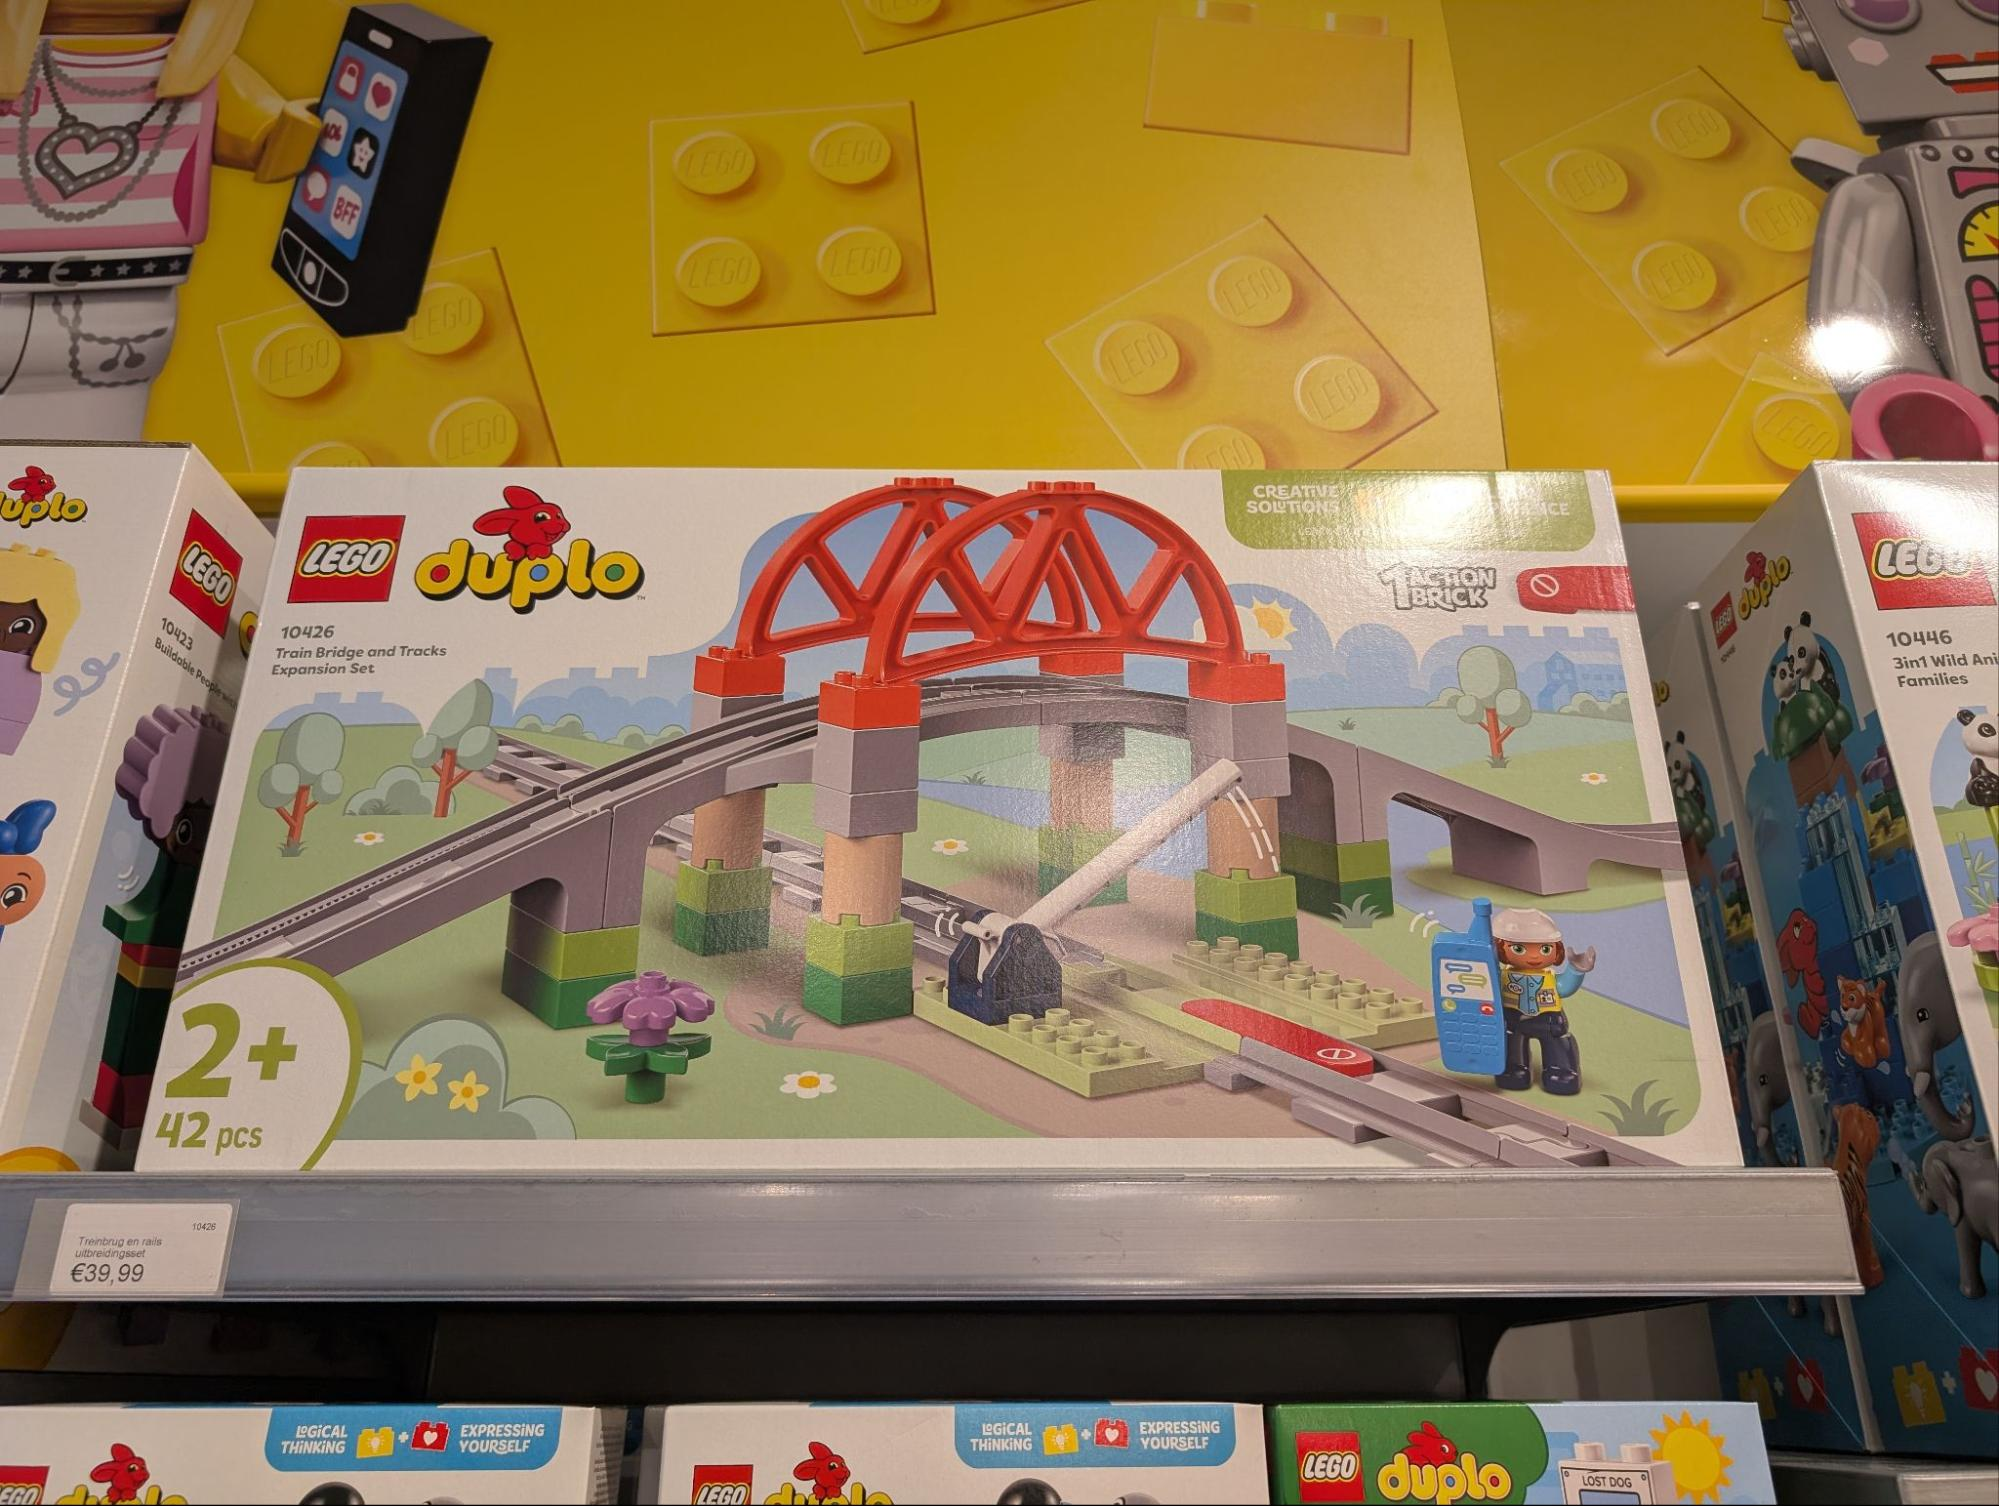

In [8]:
image_path = "image2.jpg"
render_image(image_path)

In [9]:
message = "آیا این یک هدیه مناسب برای یک کودک 3 ساله است؟"
generate_text(image_path, message)

بله، این یک هدیه مناسب برای یک کودک سه ساله است. این مجموعه لگو دوپلوی "پل آهنی و مسیر قطار" به طور خاص برای کودکان دو تا چهار ساله طراحی شده است. قطعات بزرگ و رنگارنگ آن برای دست‌های کوچک راحت است و به کودکان کمک می‌کند تا مهارت‌های حرکتی ظریف خود را توسعه دهند. این مجموعه همچنین خلاقیت و بازی تخیلی را تشویق می‌کند، زیرا کودکان می‌توانند با قطعات مختلف برای ساختن پل و مسیر قطار بازی کنند. علاوه بر این، لگو دوپلو به دلیل ایمنی و سازگاری با کودکان خردسال شناخته شده است، که آن را به انتخابی ایده‌آل برای هدیه دادن به کودکان سه ساله تبدیل می‌کند.


And here's an example in Indonesian:

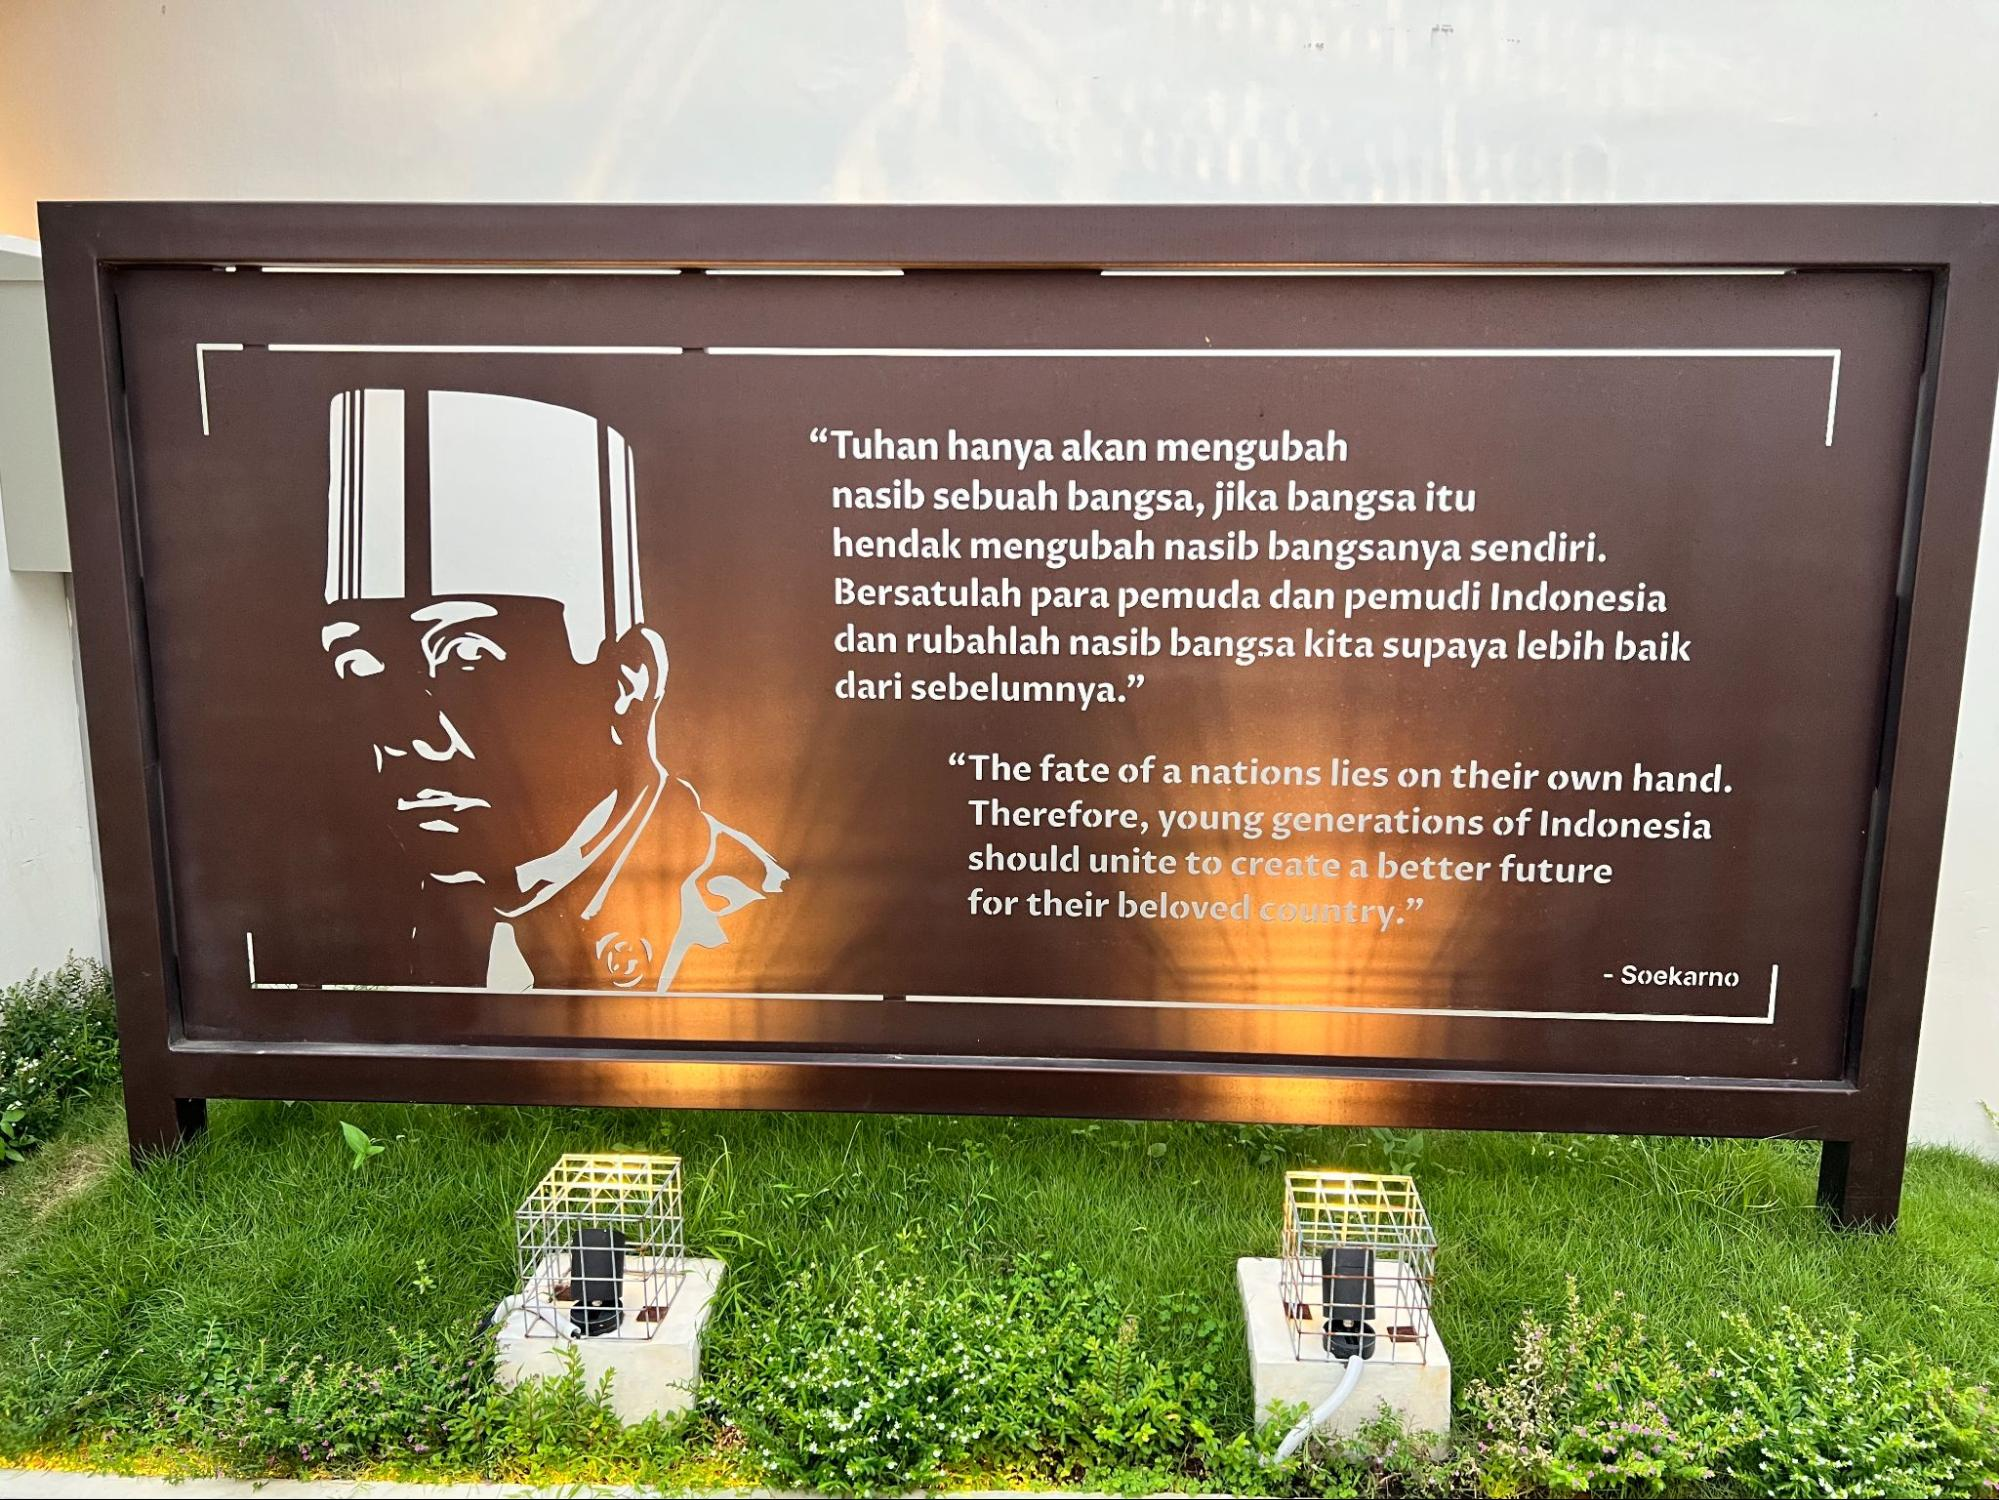

In [10]:
image_path = "image3.jpg"
render_image(image_path)

In [12]:
message = "Gambar ini berisikan kutipan dari tokoh nasional di Indonesia, siapakah tokoh itu?"
generate_text(image_path, message)

Gambar ini berisikan kutipan dari Soekarno, salah satu tokoh nasional Indonesia yang terkenal. Ia adalah Presiden pertama Indonesia dan dikenal sebagai salah satu pemimpin pergerakan kemerdekaan Indonesia. Kutipan dalam gambar tersebut mencerminkan pemikiran dan visi Soekarno tentang pembangunan bangsa dan pentingnya kontribusi generasi muda dalam menciptakan masa depan yang lebih baik.


## Captioning

Instead of asking about specific questions, we can also get the model to provide a description of an image as a whole, be it detailed descriptions or simple captions.

This can be particularly useful for creating alt text for accessibility, generating descriptions for image databases, social media content creation, and others.

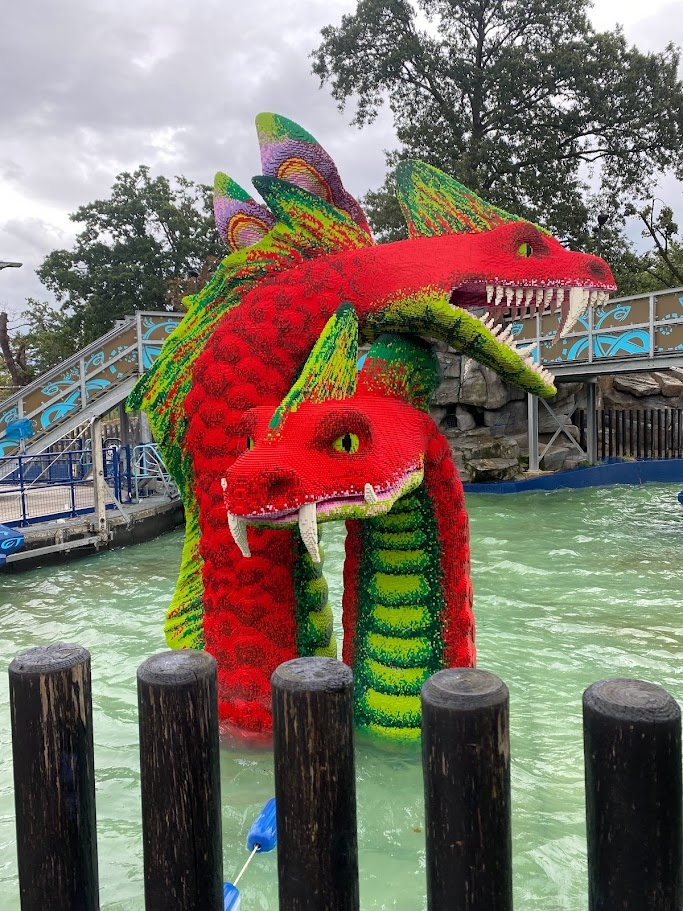

In [13]:
image_path = "image4.jpg"
render_image(image_path)

In [14]:
message = "Describe this image in detail."

generate_text(image_path, message)

In the heart of a vibrant amusement park, a magnificent and whimsical dragon sculpture emerges from the water, its scales shimmering in hues of red, green, and gold. The dragon's head, adorned with sharp teeth and piercing yellow eyes, rises above the surface, while its body coils gracefully beneath the waves. Surrounding the dragon are colorful LEGO-like structures, including a bridge with intricate blue and purple patterns and a tower that reaches towards the sky. The water, a striking shade of turquoise, is contained by a wooden fence, and beyond the fence, lush green trees provide a natural backdrop. The scene is set against a cloudy sky, adding a touch of drama to this fantastical display.


## Recognizing text

The model can recognize and extract text from images, which is useful for reading signs, documents, or other text-based content in photographs. This capability enables applications that can answer questions about text content.

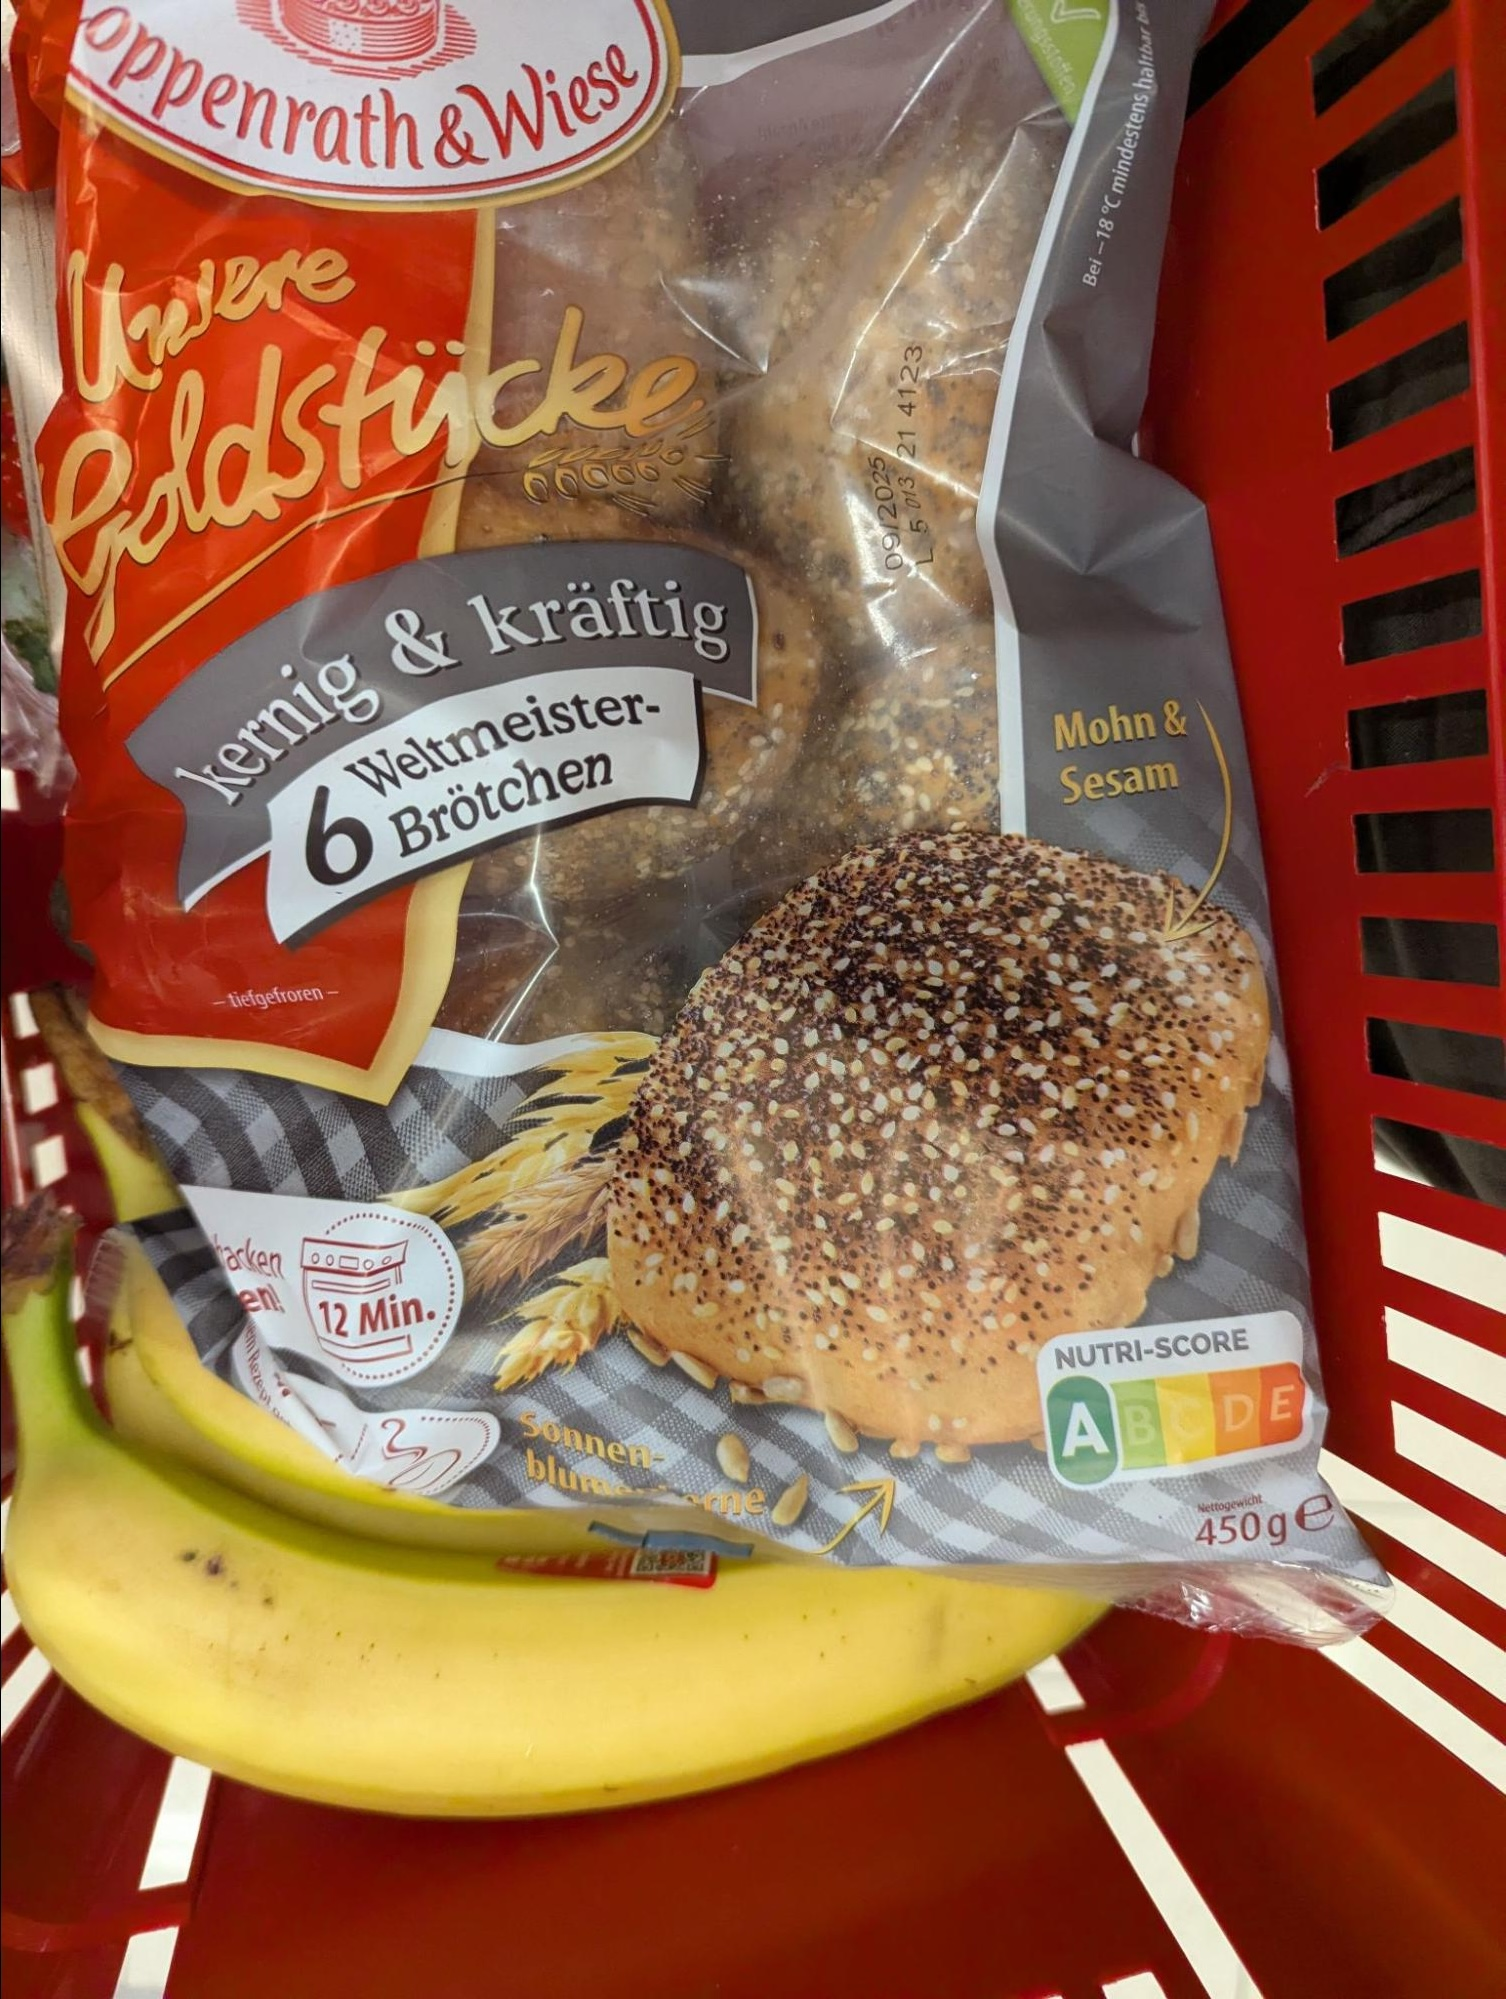

In [15]:
image_path = "image5.jpg"
render_image(image_path)

In [16]:
message = "How many bread rolls do I get?"

generate_text(image_path, message)

You get 6 bread rolls in the pack.


## Classification

Classification allows the model to categorize images into predefined classes or labels. This is useful for organizing visual content, filtering images, or extracting structured information from visual data.

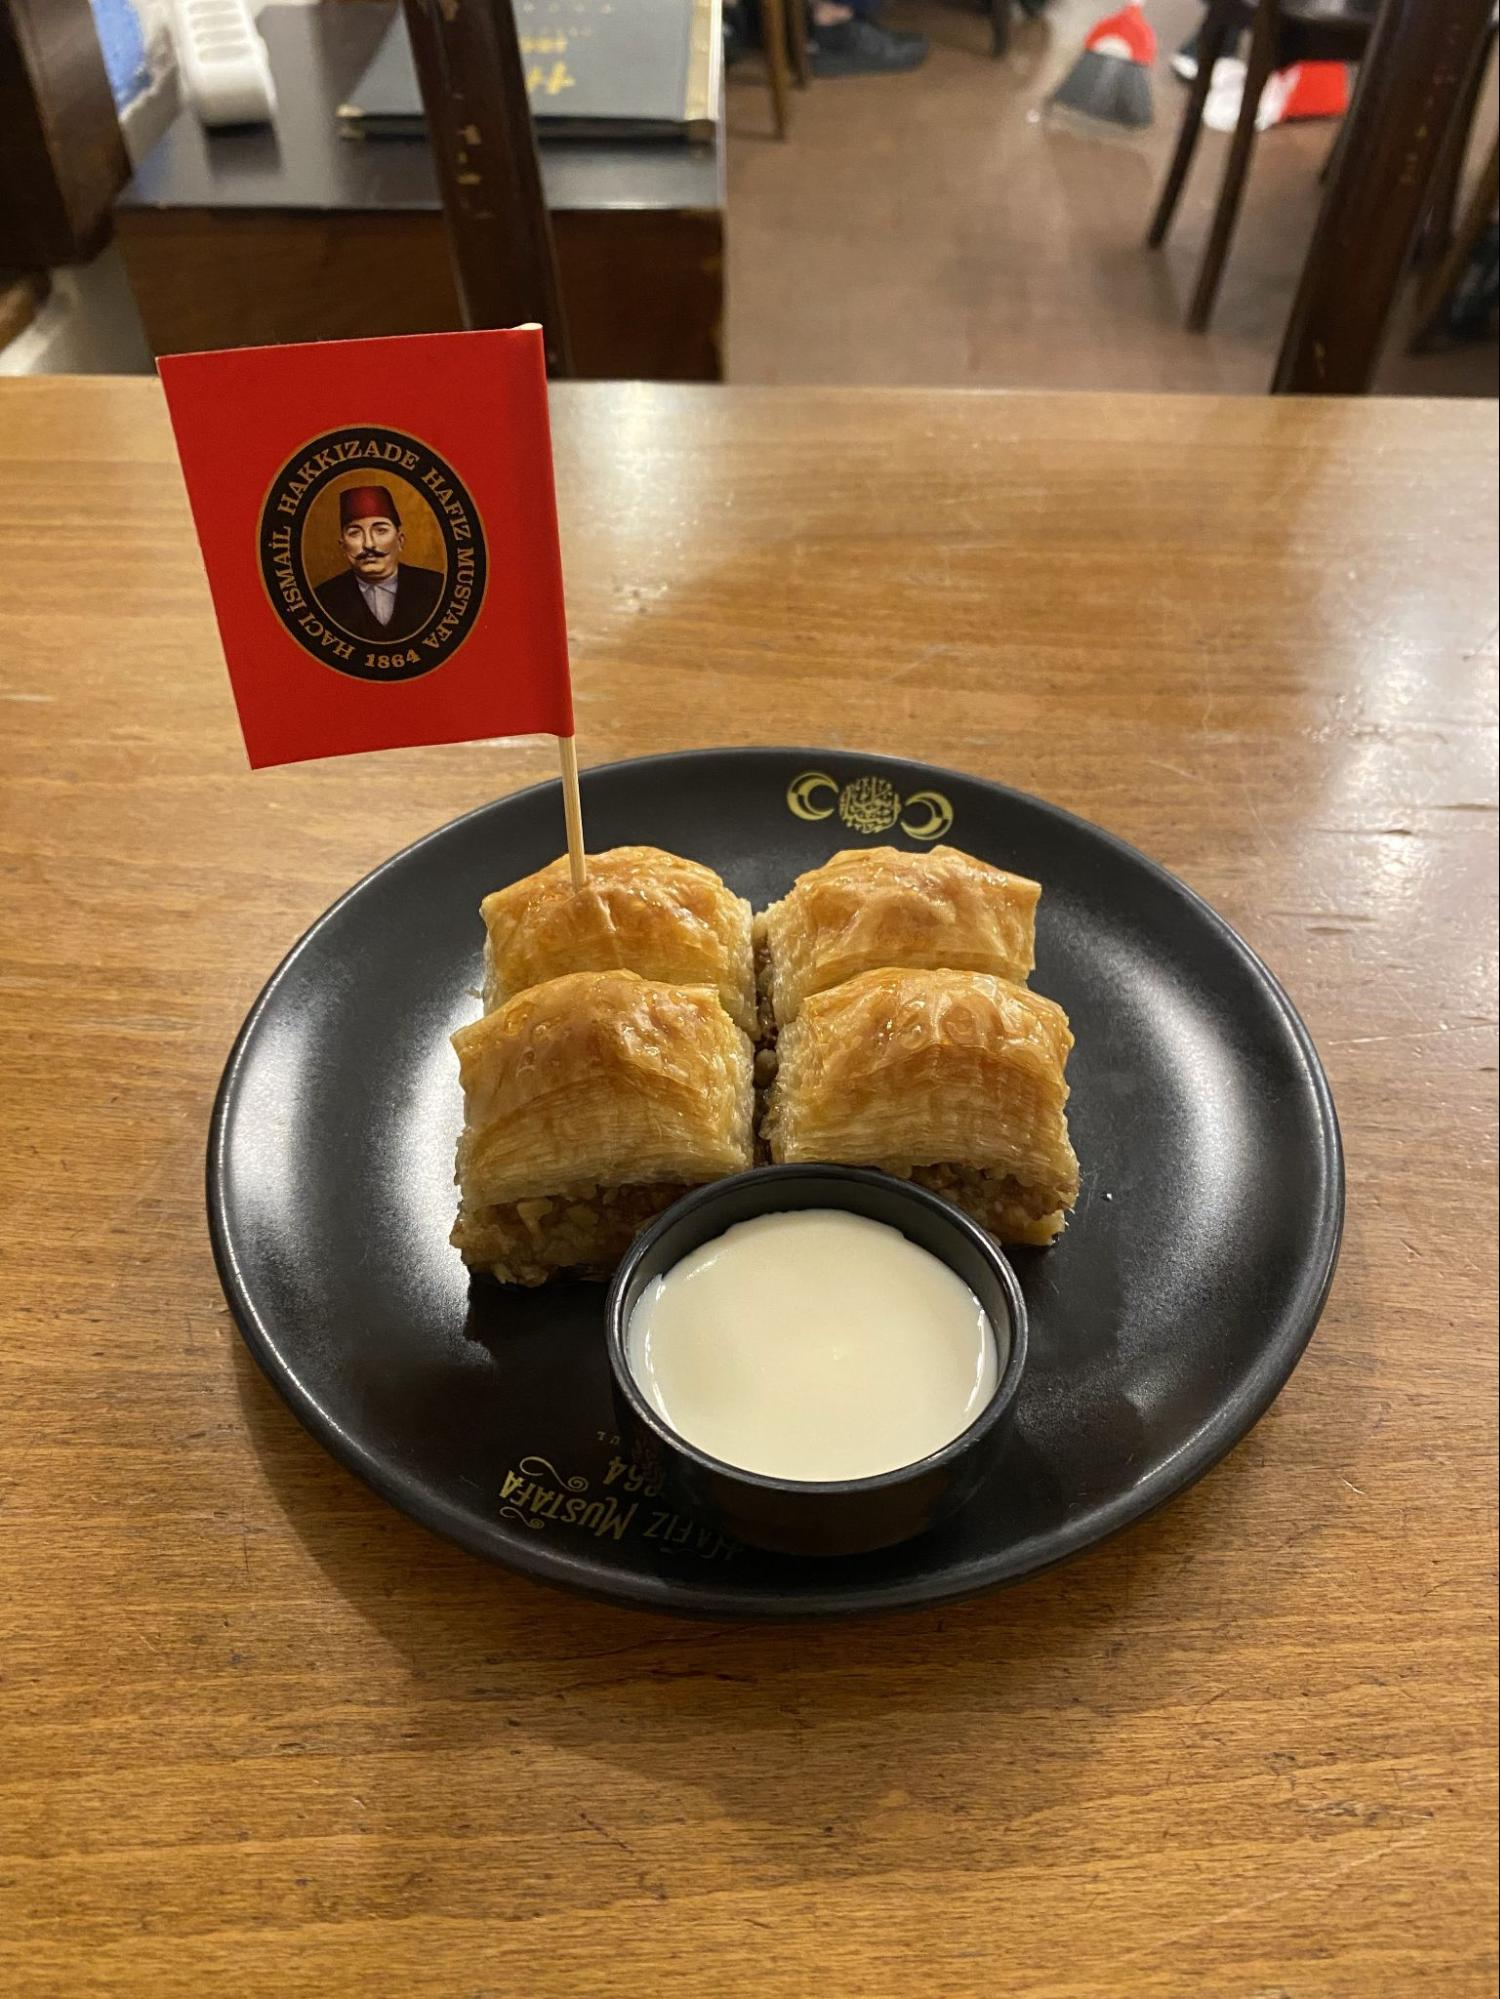

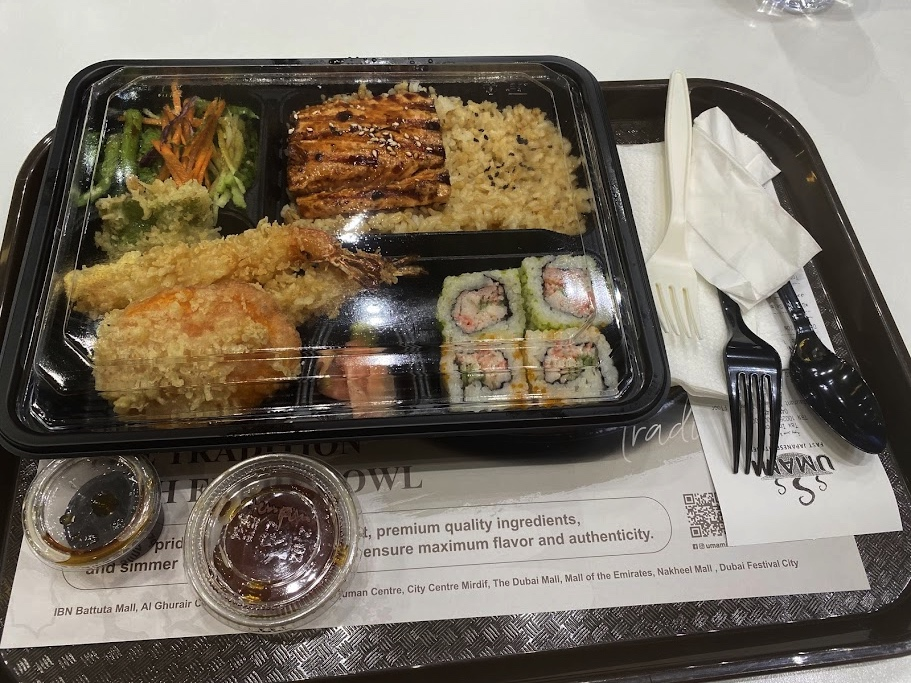

In [17]:
image_path1 = "image6.jpg"
image_path2 = "image7.jpg"
render_image(image_path1)
render_image(image_path2)

In [18]:
message = "Please classify this image as one of these dish types: japanese, malaysian, turkish, or other.Respond in the following format: dish_type: <the_dish_type>."

images = [
    image_path1, # turkish
    image_path2, # japanese
]

for item in images:
    generate_text(item, message)
    print("-" * 30)

dish_type: turkish
------------------------------
dish_type: japanese
------------------------------


## Comparing multiple images

This section demonstrates how to analyze and compare multiple images simultaneously. The API allows passing more than one image in a single call, enabling the model to perform comparative analysis between different visual inputs.

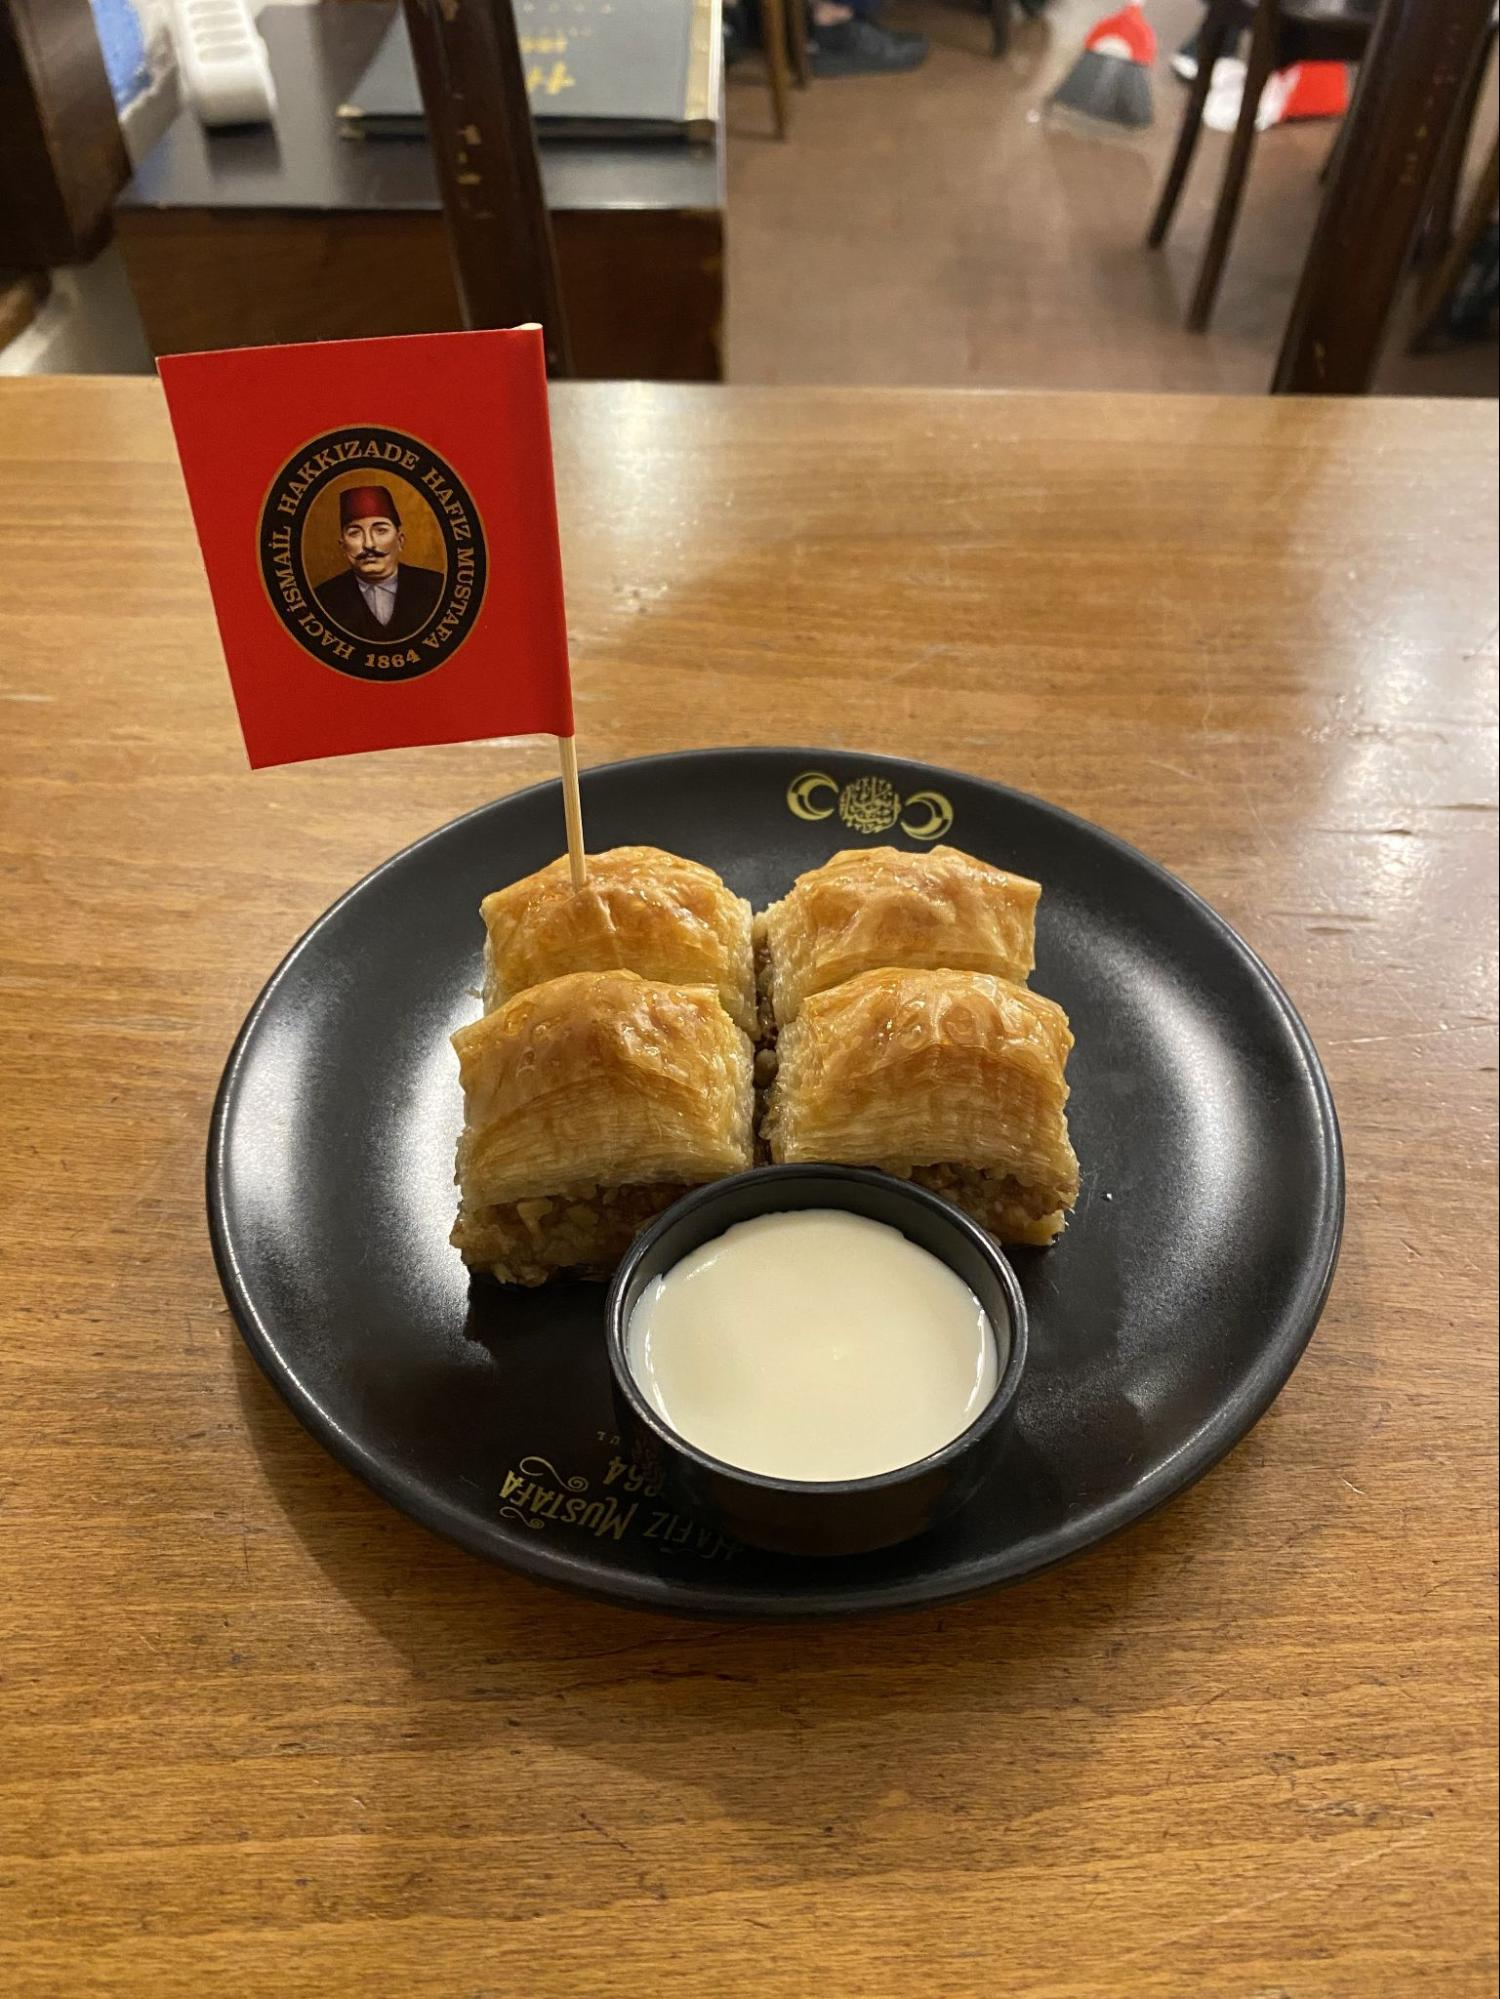

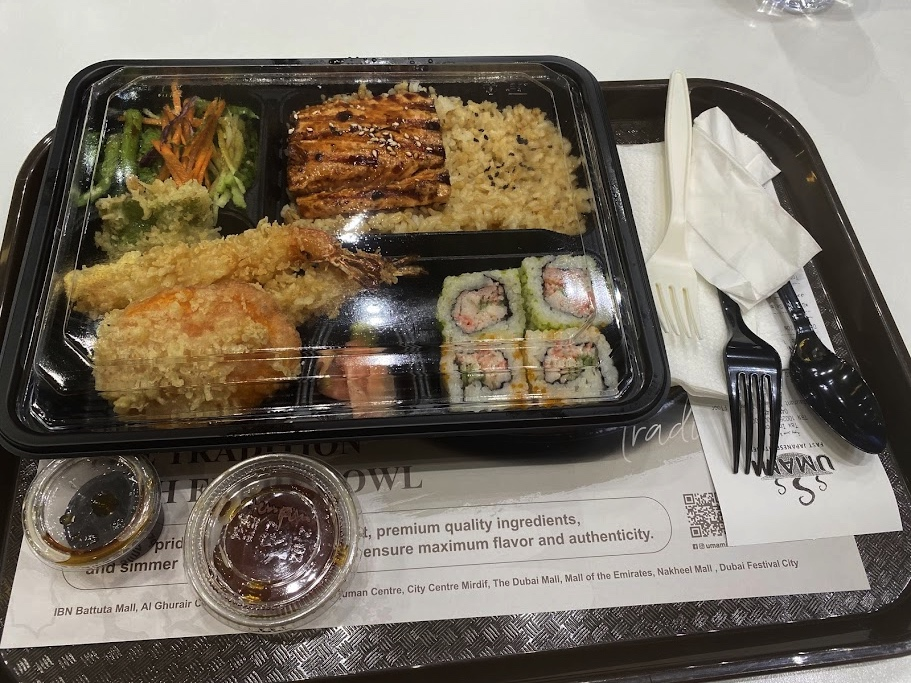

In [19]:
image_path1 = "image6.jpg"
image_path2 = "image7.jpg"
render_image(image_path1)
render_image(image_path2)

In [20]:
message = "Compare these two dishes."

with open(image_path1, "rb") as img_file1:
    base64_image_url1 = f"data:image/jpeg;base64,{base64.b64encode(img_file1.read()).decode('utf-8')}"

with open(image_path2, "rb") as img_file2:
    base64_image_url2 = f"data:image/jpeg;base64,{base64.b64encode(img_file2.read()).decode('utf-8')}"

response = co.chat(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": message},
                {"type": "image_url", "image_url": {"url": base64_image_url1}},
                {"type": "image_url", "image_url": {"url":base64_image_url2}}
            ],
        }
    ],
)

print(response.message.content[0].text)

The first dish is a Japanese-style bento box containing a variety of items such as sushi rolls, tempura shrimp, grilled salmon, rice, and vegetables. It is served in a clear plastic container with individual compartments for each food item. The second dish is a Turkish-style meal featuring baklava, a sweet pastry made with layers of phyllo dough, nuts, and honey. It is accompanied by a small bowl of cream and a red flag with a gold emblem. The baklava is presented on a black plate, while the bento box is placed on a tray with a red and gold napkin. Both dishes offer a unique culinary experience, with the Japanese bento box providing a balanced meal with a mix of proteins, carbohydrates, and vegetables, and the Turkish baklava offering a rich, sweet dessert.


## Conclusion

In this notebook, we've explored the capabilities of the Aya Vision model through various examples.

The Aya Vision model shows impressive capabilities in understanding visual content and providing detailed, contextual responses. This makes it suitable for a wide range of applications including content analysis, accessibility features, educational tools, and more.

The API's flexibility in handling different types of queries and multiple images simultaneously makes it a powerful tool if you are looking to integrate advanced computer vision capabilities into your applications.